In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import glob, os

# Get images path

In [2]:
IMG_NAME = 'boat'

img_list = []
for ext in ('0*.gif', '0*.png', '0*.jpg'):
    img_list.extend(glob.glob(os.path.join('imgs', IMG_NAME, ext)))

img_list = sorted(img_list)

print(img_list)

['imgs/boat/01.jpg', 'imgs/boat/02.jpg', 'imgs/boat/03.jpg', 'imgs/boat/04.jpg', 'imgs/boat/05.jpg', 'imgs/boat/06.jpg']


# Load images

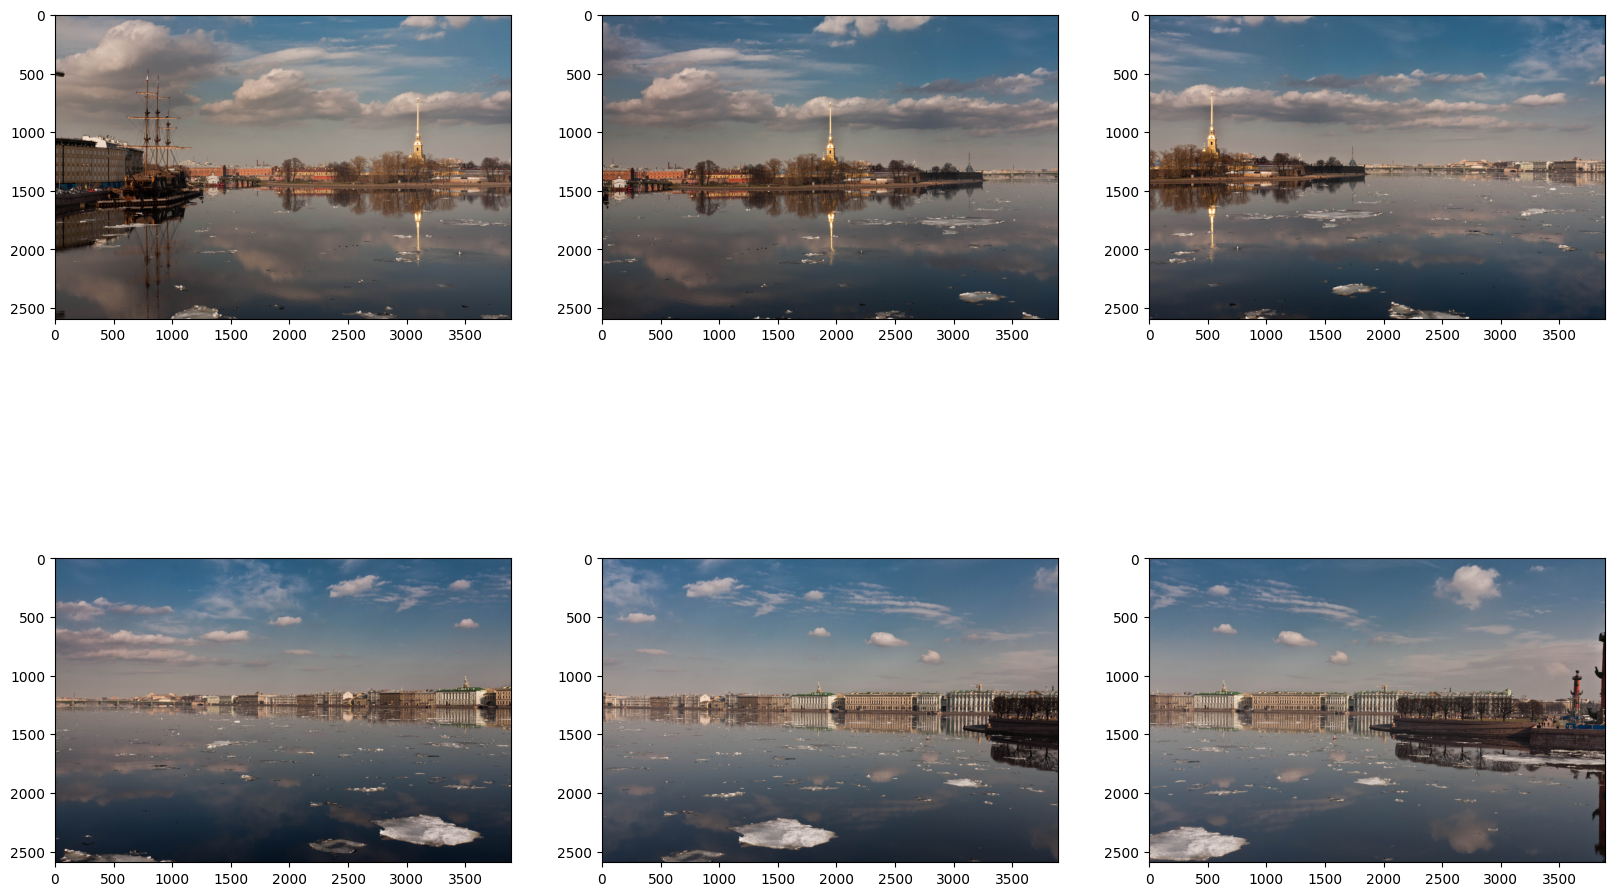

In [4]:
imgs = []

plt.figure(figsize=(20, 20))

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path)
    imgs.append(img)
    
    plt.subplot(len(img_list) // 3 + 1, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Stitch images

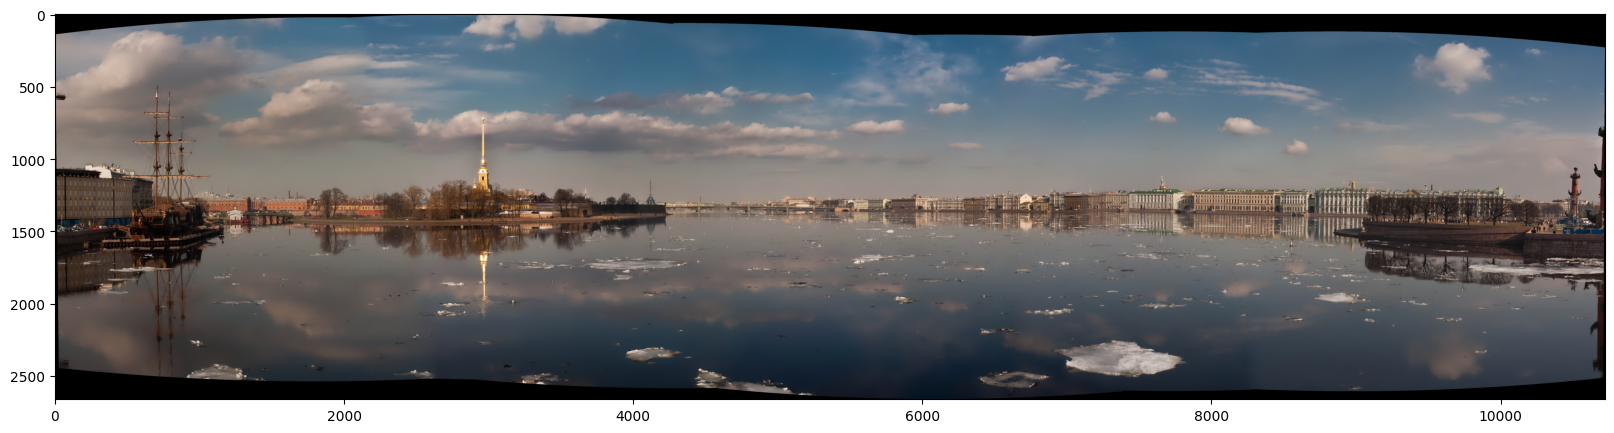

In [5]:
mode = cv2.STITCHER_PANORAMA
# mode = cv2.STITCHER_SCANS

if int(cv2.__version__[0]) == 3:
    stitcher = cv2.createStitcher(mode)
else:
    stitcher = cv2.Stitcher_create(mode)
    
status, stitched = stitcher.stitch(imgs)

if status == 0:
    cv2.imwrite(os.path.join('imgs', IMG_NAME, 'result.jpg'), stitched)

    plt.figure(figsize=(20, 20))
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
else:
    print('failed... %s' % status)

# Get image mask
- white 255
- black 0

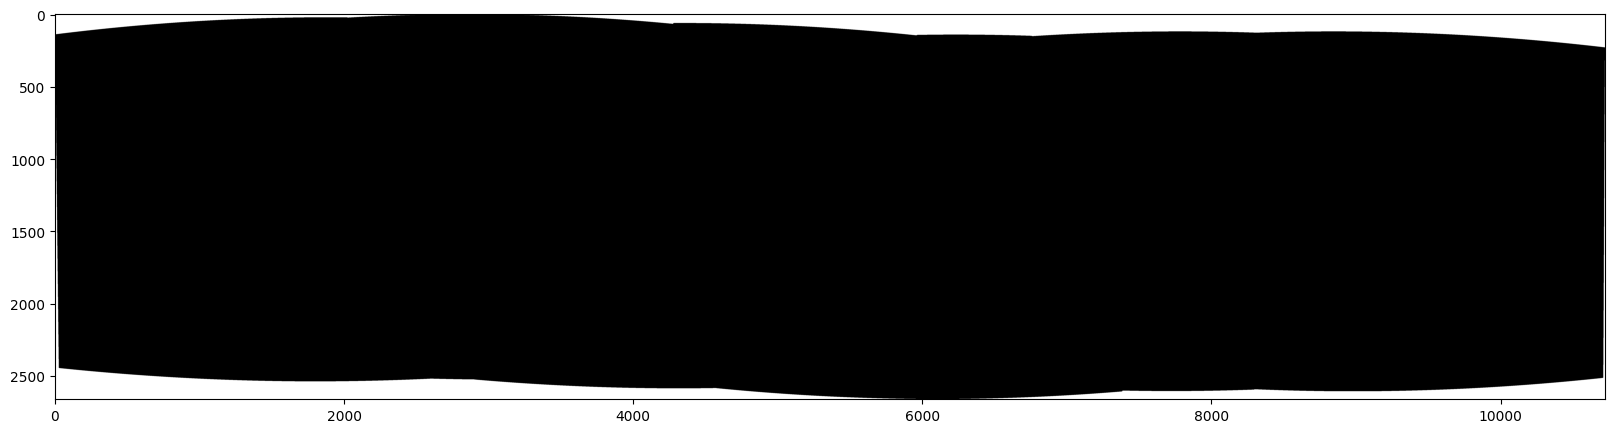

In [6]:
gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
thresh = cv2.bitwise_not(cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1])
thresh = cv2.medianBlur(thresh, 5)

plt.figure(figsize=(20, 20))
plt.imshow(thresh, cmap='gray')

# Remove margin (white space 255)

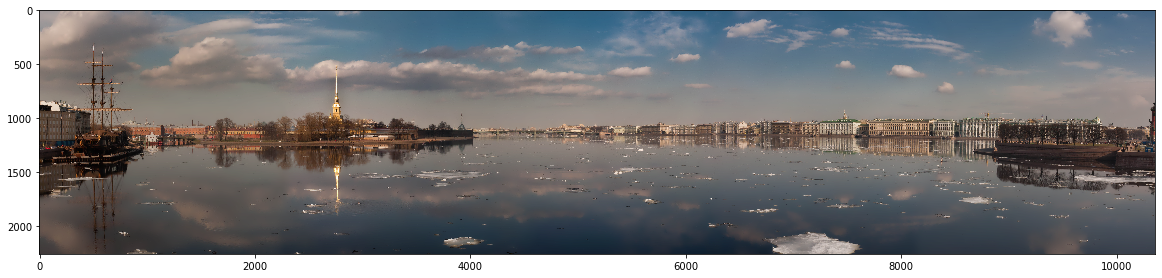

In [11]:
stitched_copy = stitched.copy()
thresh_copy = thresh.copy()

while np.sum(thresh_copy) > 0:
    thresh_copy = thresh_copy[1:-1, 1:-1]
    stitched_copy = stitched_copy[1:-1, 1:-1]
    
cv2.imwrite(os.path.join('imgs', IMG_NAME, 'result_crop.jpg'), stitched_copy)

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(stitched_copy, cv2.COLOR_BGR2RGB))